# Python Programming

## 1. Introduction to Python

- Scalar variables: `data type`, `numbers`, `strings`, *etc.*
- Collections: `list`, `tuple`, `dictionary`, `set`, *etc.*
- Control structures: `if-elif-else`, `for` loop, `while` loop, *etc.*
- Functions: build-in functions, self-defined functions, modules, library, *etc.*
- Class: definition, object, encapsulation, inheritance, polymorphism, *etc.*

## 2. Numpy, Pandas, Matplotlib

### 2.1 Numpy

`NumPy` is a Python library and can be used to perform a wide variety of (efficient) mathematical operations on arrays and matrices.

In [1]:
a = list(range(10000))
b = [0] * 10000

In [2]:
%%timeit
for i in range(len(a)):
    b[i] = a[i] ** 2

2 ms ± 4.61 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
import numpy as np

a = np.arange(10000)
b = np.zeros(10000)

In [4]:
%%timeit
b = a**2

2.76 μs ± 112 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Creating arrays

In [5]:
a = np.array([1, 2, 3])  # 1-dimensional array (rank 1)
b = np.array([[1, 2, 3], [4, 5, 6]])  # 2-dimensional array (rank 2)

print(b.shape)  # the shape (rows,columns)
print(b.size)  # number of elements

(2, 3)
6


In [6]:
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [7]:
a = a.reshape(4, 4)

b = np.random.rand(16).reshape(4, 4)
b

array([[0.00967244, 0.64831184, 0.33252616, 0.35029161],
       [0.47208615, 0.07361926, 0.8614362 , 0.56775698],
       [0.1771404 , 0.38745633, 0.41808485, 0.40363782],
       [0.54171113, 0.46625083, 0.56194795, 0.53811087]])

#### Array maths and vectorization

In [8]:
c = np.add(a, b)  # = a+b
c

array([[9.67244129e-03, 1.64831184e+00, 2.33252616e+00, 3.35029161e+00],
       [4.47208615e+00, 5.07361926e+00, 6.86143620e+00, 7.56775698e+00],
       [8.17714040e+00, 9.38745633e+00, 1.04180849e+01, 1.14036378e+01],
       [1.25417111e+01, 1.34662508e+01, 1.45619479e+01, 1.55381109e+01]])

Other common mathematical operations include:
- `-` (numpy.subtract)
- `*` (numpy.multiply)
- `/` (numpy.divide)
- `.T` (numpy.transpose())
- numpy.sqrt, numpy.sum(), numpy.mean()
- np.dot() (`@`)

In [9]:
# Matrix multiplication
a * b

array([[0.        , 0.64831184, 0.66505233, 1.05087482],
       [1.88834459, 0.3680963 , 5.16861723, 3.97429888],
       [1.41712319, 3.48710696, 4.18084855, 4.44001597],
       [6.50053355, 6.06126083, 7.86727129, 8.07166309]])

In [10]:
np.dot(a, b)  # equals to `a @ b`

array([[ 2.45150033,  2.24728442,  3.38344976,  2.98936523],
       [ 7.25394079,  8.54983747, 12.07943046, 10.42855434],
       [12.05638125, 14.85239053, 20.77541116, 17.86774345],
       [16.85882171, 21.15494359, 29.47139185, 25.30693256]])

### 2.2 Pandas

`Pandas` is a data manipulation package in Python and provides high-performance data analysis for tabular data.

#### Code example to analyze the Titanic passenger data

In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col="Name")

In [12]:
# print the first 5 lines of the dataframe

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Get DataFrame Data Types

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [14]:
# print summary statistics for each column

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(titanic.groupby("Survived")["Age"].mean())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


### 2.3 Matplotlib

`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.

#### Visualization of the Titanic passenger data

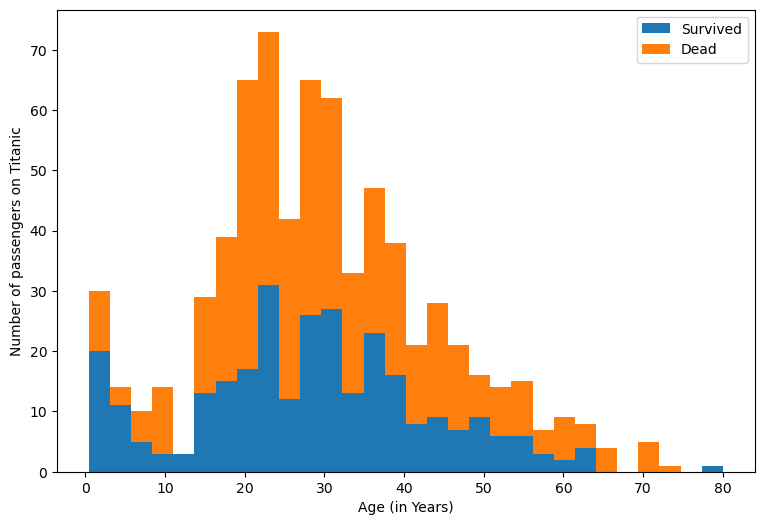

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.hist(
    [
        titanic[titanic["Survived"] == 1]["Age"],
        titanic[titanic["Survived"] == 0]["Age"],
    ],
    stacked=True,
    bins=30,
    label=["Survived", "Dead"],
)
plt.xlabel("Age (in Years)")
plt.ylabel("Number of passengers on Titanic")
plt.legend()

# GPU Programming using Python

There are several options available to work with python for GPU programming.
- [GPU Programming: When, Why and How?](https://enccs.github.io/gpu-programming/)
- [GPU Programming (Carpentries)](https://arc.leeds.ac.uk/lesson-gpu-programming/)

## 1. **`cuDF`** and **`cuML`** libraries in ![RAPIDS](img/RAPIDS-logo.png)

[RAPIDS](https://rapids.ai/) is a high-level package collections which implement CUDA functionalities and API with Python bindings.

**It only supports NVIDIA GPUs.**

- **`cuDF`** is the dataframe library for manipulating tabular datasets using GPU. cuDF provides a Pandas-like API for loading, joining, aggregating, filtering, and manipulating data.
- **`cuML`** is a suite of libraries that implement algorithms and mathematical primitives functions to train machine learning models on your data to make predictions, similar to the `scikit-learn` API.



## 2. Numba

`Numba` is an open-source just-in-time (JIT) compiler that translates a subset of Python and NumPy into fast machine code using LLVM.

`Numba` offers options for parallelising Python code for CPUs and GPUs, with minor code changes.

### 2.1 `numba.jit()` decorator

Numba provides several utilities for code generation, and its central feature is the `numba.jit()` decorator.

In [17]:
import numpy as np

mx = np.arange(10000).reshape(100, 100)


def go_slow(a):  # Function is compiled and runs in machine code
    rst = 0.0
    for i in range(a.shape[0]):
        rst += np.sin(a[i, i])
    return rst


%timeit go_slow(mx)

74.6 μs ± 2.14 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [18]:
from numba import jit


@jit(nopython=True)
def go_fast(a):
    rst = 0.0
    for i in range(a.shape[0]):
        rst += np.cos(a[i, i])
    return rst


%timeit go_fast(mx)

The slowest run took 5.40 times longer than the fastest. This could mean that an intermediate result is being cached.
3.83 μs ± 3.5 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 2.2 `ufunc` and `gufunc`

Another feature of Numba is to generate NumPy universal functions.

There are two types of universal functions:
- Those which operate on scalars are “universal functions” (`ufunc`), which are achieved via `@vectorize` decorator
- Those which operate on higher dimensional arrays and scalars are “generalized universal functions” (`gufunc`), which are achived via `@guvectorize` decorator

In [19]:
import math
import numpy as np
import numba


# a simple version without using numba
def func_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cpu")
def func_numba_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cuda")
def func_numba_gpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)

In [20]:
N = 10000000
mx = np.random.rand(N)
result = np.random.rand(N)

In [21]:
%%timeit -r 1
for i in range(N):
    result[i] = func_cpu(mx[i], mx[i])

3.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
%timeit result = func_numba_cpu(mx, mx)

170 ms ± 141 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit result = func_numba_gpu(mx, mx)

75.5 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**NOTE**
- Using `ufunc` (or `gufunc`) for GPU programming may not always yield optimal performance due to automatic handling of data transfer and kernel launching.
- In practical applications, not every function can be constructed as a `ufunc`.
- To gain a better performance, one need to calibrate kernels and manually manage data transfer.

### 2.3 An example for vector addition

In [24]:
import numpy as np
import numba


@numba.cuda.jit
def func(a, b, c):
    # like threadIdx.x + (blockIdx.x * blockDim.x)
    tid = numba.cuda.grid(1)
    size = len(c)

    if tid < size:
        c[tid] = a[tid] + b[tid]

In [25]:
N = 10000000
a = numba.cuda.to_device(np.random.random(N))
b = numba.cuda.to_device(np.random.random(N))
c = numba.cuda.device_array_like(a)

In [26]:
%timeit func.forall(len(a))(a, b, c)
print(c.copy_to_host())

2.64 ms ± 1.08 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[0.84947737 1.29048631 1.10367233 ... 1.53112959 0.72425712 0.81064006]


In [27]:
nthreads = 256  # Enough threads per block for several warps per block
nblocks = (len(a) // nthreads) + 1  # Enough blocks to cover entire vector

%timeit func[nblocks, nthreads](a, b, c)
print(c.copy_to_host())

2.64 ms ± 103 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[0.84947737 1.29048631 1.10367233 ... 1.53112959 0.72425712 0.81064006]


## 3. Jax

<!--TODO -->

## 4. CuPy

`CuPy` is a NumPy/SciPy-compatible array library for GPU-accelerated computing with Python. 
- It has been developed for NVIDIA GPUs but has experimental support both NVIDIA and AMD GPUs.
- All you need to do is replace `numpy` and `scipy` with `cupy` and `cupyx.scipy` in your Python code.

Tutorials:
- https://docs.cupy.dev/en/stable/user_guide/basic.html
- https://arc.leeds.ac.uk/lesson-gpu-programming/02-cupy/index.html
- https://carpentries-incubator.github.io/lesson-gpu-programming/cupy.html

**Replacement of numpy with cupy**

In [28]:
import cupy as cp
import numpy as np

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# creating arrays
lst_cpu = np.array(lst)
lst_gpu = cp.array(lst)

# calculate the Euclidean norm
lst_cpu_norm = np.linalg.norm(lst_cpu)
lst_gpu_norm = cp.linalg.norm(lst_gpu)

print("Using Numpy: ", lst_cpu_norm)
print("Using Cupy:  ", lst_gpu_norm)

Using Numpy:  16.881943016134134
Using Cupy:   16.881943016134134


**Speed comparison between cupy and numpy**

In [29]:
# speed comparison between cupy and numpy

import time

# NumPy and CPU Runtime
start = time.time()
x_cpu = np.random.random((10000, 10000))
end = time.time()
print("Time consumed by numpy: ", end - start)

# CuPy and GPU Runtime
start = time.time()
x_gpu = cp.random.random((10000, 10000))
end = time.time()
print("Time consumed by cupy : ", end - start)

Time consumed by numpy:  0.5348212718963623
Time consumed by cupy :  0.16929936408996582


**Interfacing with user-defined Kernels**

In [30]:
import cupy as cp

add_kernel = cp.RawKernel(
    r"""
extern "C" __global__
void my_add(const float* x1, const float* x2, float* y) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] + x2[tid];
}
""",
    "my_add",
)

x1 = cp.arange(25, dtype=cp.float32).reshape(5, 5)
x2 = cp.arange(25, dtype=cp.float32).reshape(5, 5)

x2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)

In [31]:
y = cp.zeros((5, 5), dtype=cp.float32)
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
add_kernel((5,), (5,), (x1, x2, y))  # grid, block and arguments

y

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

## 5. PyCUDA

[PyCUDA](https://pypi.org/project/pycuda/) is a Python programming environment for CUDA
- It allows users to access to NVIDIA’s CUDA parallel computing API from Python.
- PyCUDA is powerful library but only runs on NVIDIA GPUs.
- Knowledge of CUDA programming is needed.

In [36]:
# Step 1: Initialization

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

In [37]:
# Step 2: Transferring data

# 2.1: Generating numbers with single precision
import numpy as np

mx_cpu = np.random.randn(4, 4)
mx_cpu = mx_cpu.astype(np.float32)
print(mx_cpu, end="\n")

# 2.2: Allocation of memory on GPU
mx_gpu = cuda.mem_alloc(mx_cpu.nbytes)

# 2.3: Transferring data from CPU (host) to GPU (device)
cuda.memcpy_htod(mx_gpu, mx_cpu)

[[ 1.5175675  -0.257516   -0.75677353  1.8763617 ]
 [ 1.5207194  -0.4681523   0.9198897   1.1434488 ]
 [ 0.56602633 -0.9412994  -1.265326    0.28931567]
 [-0.52165884 -0.822712   -0.75301474 -0.5751968 ]]


In [38]:
# Step 3: Executing a kernel on GPU

# 3.1 Definition of the kernel
mod = SourceModule(
    """
  __global__ void doublify(float *a)
  {
    int idx = threadIdx.x + threadIdx.y*4;
    a[idx] *= 2.0;
  }
  """
)

# 3.2 Compile this kernel, loading it onto GPU, and then call this kernel
func = mod.get_function("doublify")

func(mx_gpu, block=(4, 4, 1), grid=(1, 1))

In [39]:
# Step 4: Transferring data from GPU (device) to CPU (host)

mx_doubled = np.empty_like(mx_cpu)
cuda.memcpy_dtoh(mx_doubled, mx_gpu)

print(mx_cpu, "\n\n", mx_doubled)

[[ 1.5175675  -0.257516   -0.75677353  1.8763617 ]
 [ 1.5207194  -0.4681523   0.9198897   1.1434488 ]
 [ 0.56602633 -0.9412994  -1.265326    0.28931567]
 [-0.52165884 -0.822712   -0.75301474 -0.5751968 ]] 

 [[ 3.035135   -0.515032   -1.5135471   3.7527235 ]
 [ 3.0414388  -0.9363046   1.8397794   2.2868977 ]
 [ 1.1320527  -1.8825988  -2.530652    0.57863134]
 [-1.0433177  -1.645424   -1.5060295  -1.1503936 ]]


In [40]:
# Bonus: Abstracting Away the Complications
# Using a pycuda.gpuarray to achieve the same effect with less writing

import pycuda.gpuarray as gpuarray

mx_gpu = gpuarray.to_gpu(np.random.randn(4, 4).astype(np.float32))
mx_doubled = (2 * mx_gpu).get()

print(mx_gpu, "\n\n", mx_doubled)

[[ 0.24116784 -0.5703912   0.8994447  -0.0712574 ]
 [-0.9725065   0.44660795 -0.27463588  0.23193799]
 [ 0.28120583  1.1501592   1.5640221  -1.6654408 ]
 [ 0.6329049   1.5537844  -0.04895584  0.08967403]] 

 [[ 0.4823357  -1.1407824   1.7988894  -0.1425148 ]
 [-1.945013    0.8932159  -0.54927176  0.46387598]
 [ 0.56241167  2.3003185   3.1280441  -3.3308816 ]
 [ 1.2658098   3.1075687  -0.09791169  0.17934807]]
